<a href="https://colab.research.google.com/github/ajayn3300/SMS_Spam_Detector---NLP/blob/main/SMS_Spam_Detector_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns 

In [237]:
# import data
data=pd.read_csv('https://raw.githubusercontent.com/ajayn3300/SMS_Spam_Detector---NLP/main/spam.csv',encoding='latin-1')
data=data.loc[:,['v1','v2']]

In [238]:
# data sample
data.sample(3)

,v1,v2
1950,ham,Oh ic. I thought you meant mary jane.
3745,ham,I'm not. She lip synced with shangela.
3010,ham,"Hm good morning, headache anyone? :-)"


In [239]:
#data shape
data.shape

(5572, 2)

In [240]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Cleaning

In [241]:
# Let's rename the columns first
data.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [242]:
#data sample
data.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [243]:
# null values
data.isna().sum()

target     0
message    0
dtype: int64

In [244]:
#duplicate values
data[data.duplicated()]

,target,message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [245]:
# removing duplicates
data.drop_duplicates(inplace=True)

In [246]:
# new shape 
data.shape

(5169, 2)

# EDA

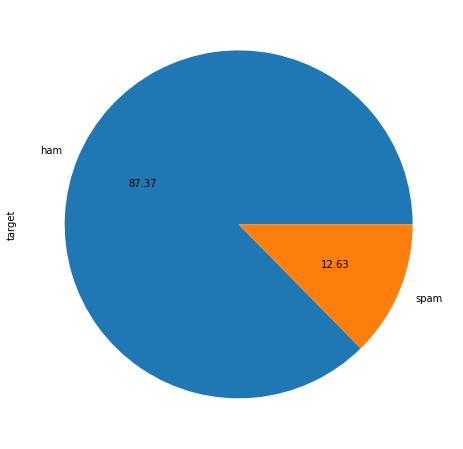

In [247]:
# lets check our target data 
plt.figure(figsize=(15,8))
data.target.value_counts().plot(kind='pie',autopct='%0.2f')

      Oops! Imbalaced dataset.

In [248]:
# add no. of character in text 
data['character_count']=data['message'].apply(len)

In [249]:
#adding column name no.of words 
nltk.download('punkt')

data['words_count']=data.message.apply(lambda x : len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [250]:
# adding column called sentence count
data['sent_count']=data.message.apply(lambda x : len(nltk.sent_tokenize(x)))

In [251]:
# data sample
data.sample(5)

,target,message,character_count,words_count,sent_count
707,ham,Quite late lar... Ard 12 anyway i wun b drivin...,49,12,1
5252,ham,You do your studies alone without anyones help...,77,17,2
3591,ham,I anything lor...,17,4,1
3468,ham,All day working day:)except saturday and sunday..,49,11,1
1501,spam,HOT LIVE FANTASIES call now 08707509020 Just 2...,122,25,1


In [252]:
# description for ham
data[data['target']=='ham'].describe()

,character_count,words_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [253]:
#description for spam
data[data['target']=='spam'].describe()

,character_count,words_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


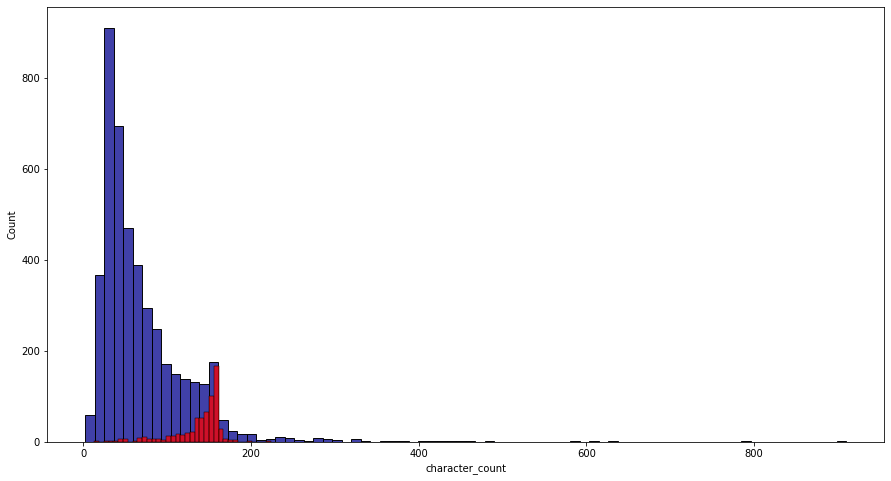

In [254]:
# Number of chacracter count
plt.figure(figsize=(15,8))
sns.histplot(data[data['target']=='ham'].character_count,color='darkblue',bins=80)
sns.histplot(data[data['target']=='spam'].character_count,color='red')

      Numbers of character count  are less in spam(red) 

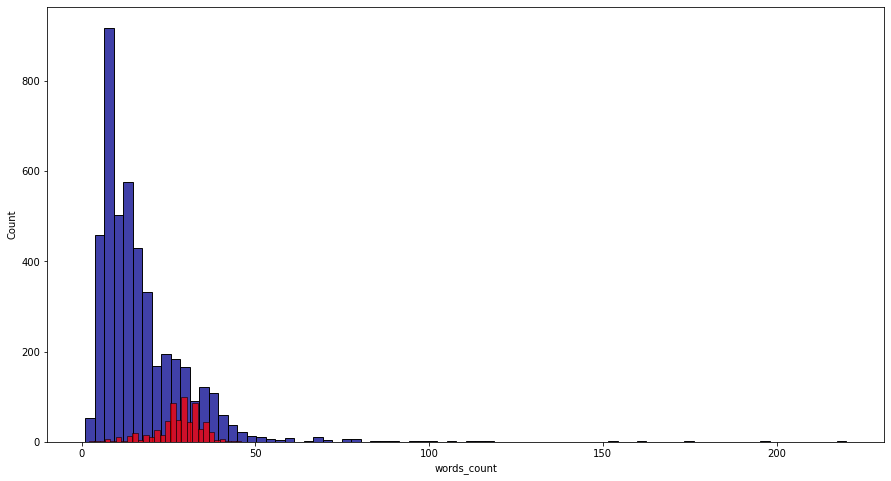

In [255]:
# no.of words count
plt.figure(figsize=(15,8))
sns.histplot(data[data['target']=='ham'].words_count,color='darkblue',bins=80)
sns.histplot(data[data['target']=='spam'].words_count,color='red')

In [256]:
data[data['target']=='ham'].words_count.mean()

17.12090345438441

<Figure size 720x576 with 0 Axes>

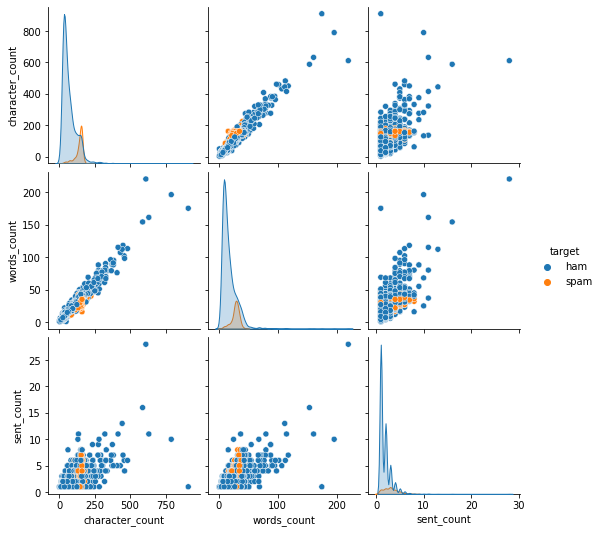

In [257]:
plt.figure(figsize=(10,8))
sns.pairplot(data,hue='target')

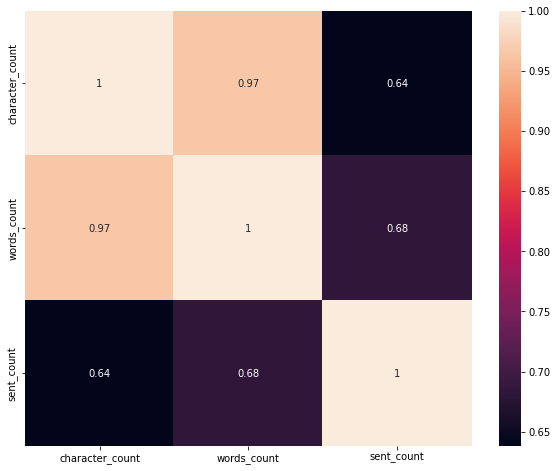

In [258]:
plt.figure(figsize=(10,8))

sns.heatmap(data.corr(),annot=True)

   HIGH multicolinearity...we will keep only one columns from these three.

# Data Preprocessing 

In [259]:
# changing into lower case
data['message']=data.message.apply(lambda x :x.lower())

In [260]:
# removing special characters and punctuations
data['message']=data.message.apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [261]:
# tokenization
data['message']=data.message.apply(lambda x : nltk.word_tokenize(x))

In [262]:
# removing stopwords

#library
from nltk.corpus import stopwords
nltk.download('stopwords')


#remove
data['message']=data.message.apply(lambda  x:[i for i in x if i not in stopwords.words('english')])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [263]:
# stemming

#library 
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

#let's stem
data['message']=data.message.apply(lambda x:' '.join([stemmer.stem(i) for i in x]))

In [264]:
# label encoding of our target variable
data['target']=data.target.apply(lambda x :1 if x=='spam' else 0)

In [265]:
#data sample
data.head(3)

,target,message,character_count,words_count,sent_count
0,0,go jurong point crazi avail bugi n great world...,111,24,2
1,0,ok lar joke wif u oni,29,8,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2


In [301]:
# creating Wordclouds 


from wordcloud import WordCloud     #import library
wc=WordCloud(width=700,height=600,min_font_size=10,background_color='black')    #intiate class

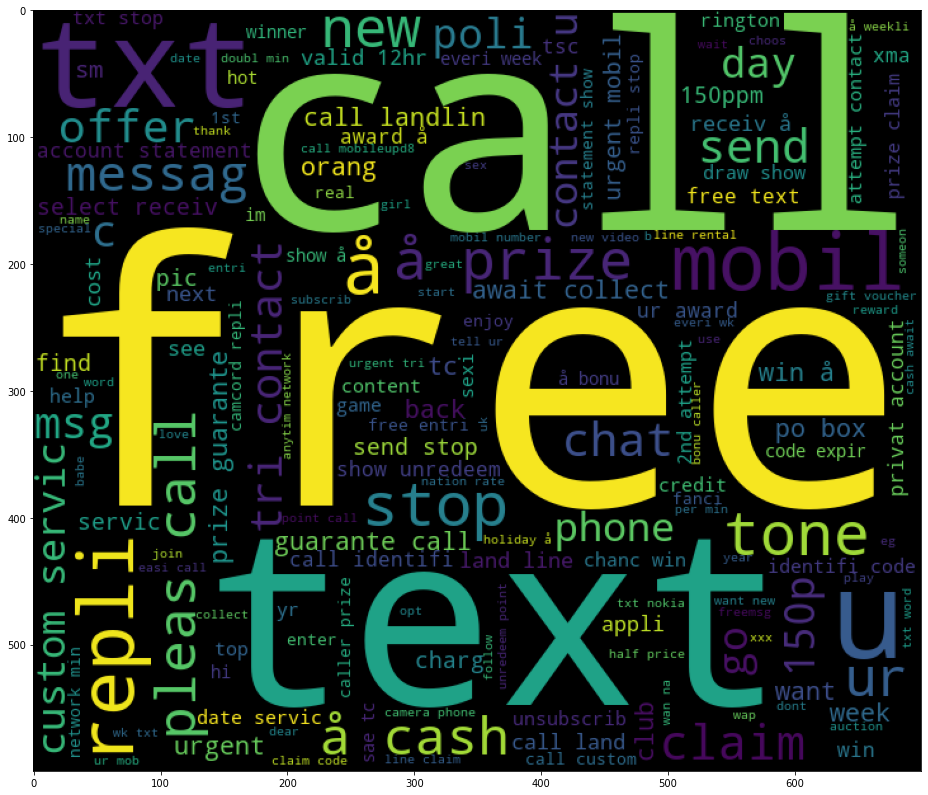

In [304]:
# word cloud for spam messages
spam_wc=wc.generate(data[data['target']==1]['message'].str.cat(sep=' '))
plt.figure(figsize=(18,14))
plt.imshow(spam_wc)

      These are the words in spam messages which have occured for most no.
             of time. The size of the words represents the occurence of those
                            words ,bigger the size ,larger the no. of occurence.

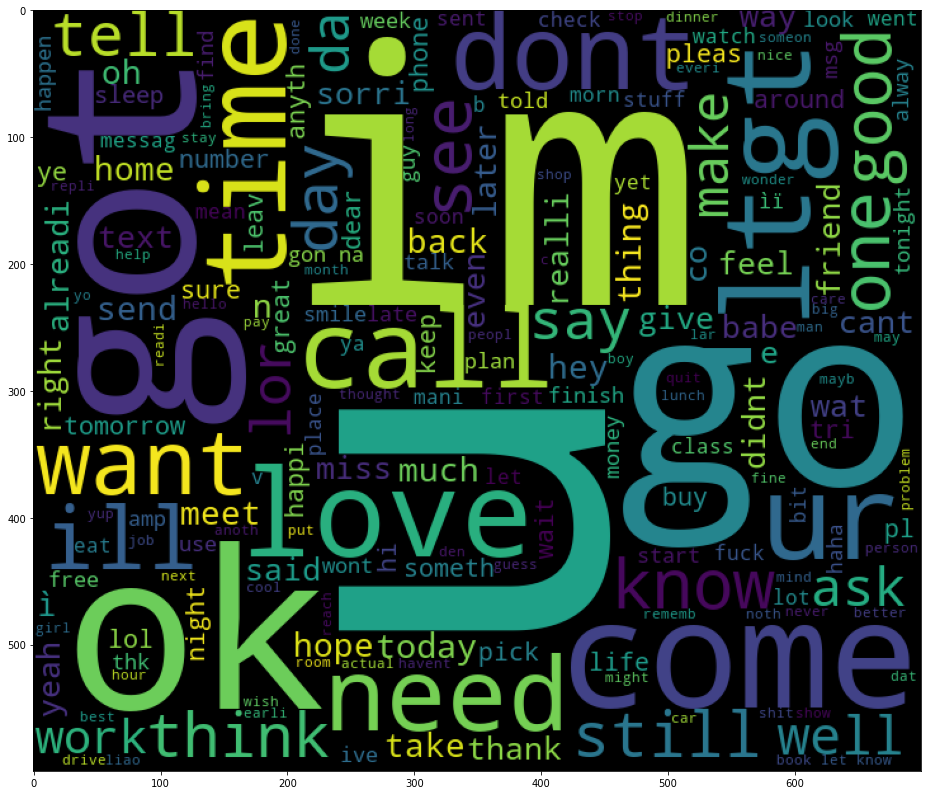

In [311]:
# word cloud from ham message
ham_wc=wc.generate(data[data['target']==0]['message'].str.cat(sep=' '))
plt.figure(figsize=(18,14))
plt.imshow(ham_wc)

      Same goes with messages which are not spam